<a href="https://colab.research.google.com/github/Saikeerthansa/PRODIGY_ML/blob/main/PRODIGY_ML_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saikeerthansk1","key":"d00b2adc477a5c2cdc0441f3ede158d1"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:09<00:00, 227MB/s]
100% 1.06G/1.06G [00:09<00:00, 124MB/s]


In [7]:
! unzip /content/dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [8]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

In [9]:
train_dir = '/content/train'
test_dir = '/content/test'

In [10]:
num_cats_train = len(os.listdir(os.path.join(train_dir, 'cats')))
num_dogs_train = len(os.listdir(os.path.join(train_dir, 'dogs')))
num_cats_test = len(os.listdir(os.path.join(test_dir, 'cats')))
num_dogs_test = len(os.listdir(os.path.join(test_dir, 'dogs')))

print(f'Number of cats in train set: {num_cats_train}')
print(f'Number of dogs in train set: {num_dogs_train}')
print(f'Number of cats in test set: {num_cats_test}')
print(f'Number of dogs in test set: {num_dogs_test}')


Number of cats in train set: 10000
Number of dogs in train set: 10000
Number of cats in test set: 2500
Number of dogs in test set: 2500


In [11]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (128, 128))
                images.append(img)
                labels.append(label)
    return images, labels

In [12]:
cats_train, labels_cats_train = load_images_from_folder(os.path.join(train_dir, 'cats'), 0)
dogs_train, labels_dogs_train = load_images_from_folder(os.path.join(train_dir, 'dogs'), 1)

In [13]:
cats_test, labels_cats_test = load_images_from_folder(os.path.join(test_dir, 'cats'), 0)
dogs_test, labels_dogs_test = load_images_from_folder(os.path.join(test_dir, 'dogs'), 1)

In [14]:
X_train = np.array(cats_train + dogs_train)
y_train = np.array(labels_cats_train + labels_dogs_train)

X_test = np.array(cats_test + dogs_test)
y_test = np.array(labels_cats_test + labels_dogs_test)

In [15]:
def extract_hog_features(images):
    hog_features = []
    for image in images:
        fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                            cells_per_block=(1, 1), visualize=True, multichannel=False)
        hog_features.append(fd)
    return hog_features

In [16]:
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

<ipython-input-15-27ebee6ec69e>:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),


In [17]:
X_train_hog = np.array(X_train_hog)
Y_train = np.array(y_train)
X_test_hog = np.array(X_test_hog)
Y_test = np.array(y_test)

In [18]:
X_train_hog, X_val_hog, Y_train, Y_val = train_test_split(X_train_hog, Y_train, test_size=0.2, random_state=42)

In [19]:
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_hog, Y_train)

SVC(kernel='linear', probability=True)

In [20]:
Y_val_pred = svm.predict(X_val_hog)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.6995


In [21]:
Y_test_pred = svm.predict(X_test_hog)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7034


In [22]:
_, hog_image = hog(X_train[0], orientations=8, pixels_per_cell=(16, 16),
                   cells_per_block=(1, 1), visualize=True, multichannel=False)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

<ipython-input-22-d5b2d16d1ee5>:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  _, hog_image = hog(X_train[0], orientations=8, pixels_per_cell=(16, 16),


Text(0.5, 1.0, 'Original Image')

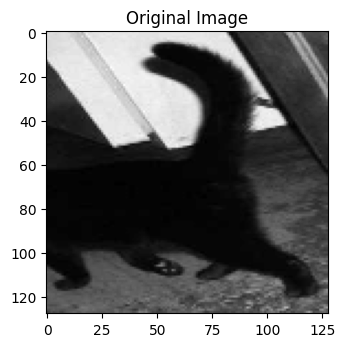

In [23]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0], cmap=plt.cm.gray)
plt.title('Original Image')

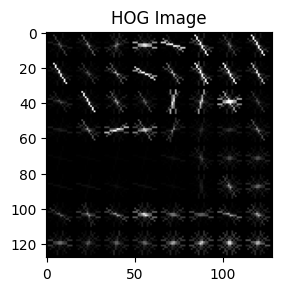

In [24]:
plt.subplot(1, 2, 2)
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
plt.title('HOG Image')
plt.show()

<ipython-input-15-27ebee6ec69e>:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),


Predicted class: 1
Actual class: 1
Is correct: [ True]


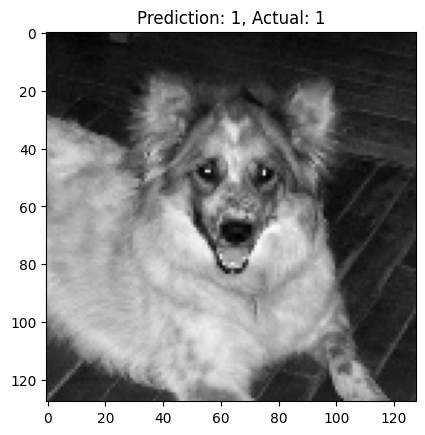

In [25]:
import random

def test_model_with_random_image():
  random_index = random.randint(0, len(X_test) - 1)
  test_image = X_test[random_index]

  test_image_hog = extract_hog_features([test_image])[0]


  prediction = svm.predict([test_image_hog])

  actual_label = Y_test[random_index]
  is_correct = prediction == actual_label

  print(f"Predicted class: {prediction[0]}")
  print(f"Actual class: {actual_label}")
  print(f"Is correct: {is_correct}")

  plt.imshow(test_image, cmap=plt.cm.gray)
  plt.title(f"Prediction: {prediction[0]}, Actual: {actual_label}")
  plt.show()

test_model_with_random_image()
